In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

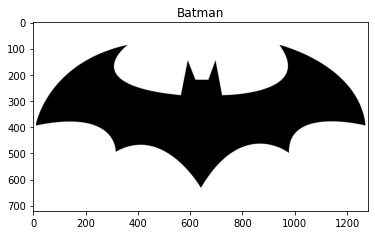

In [2]:
img=plt.imread('Logo-Batman.png')
plt.imshow(img)
plt.title('Batman')
plt.show()

<IPython.core.display.Javascript object>


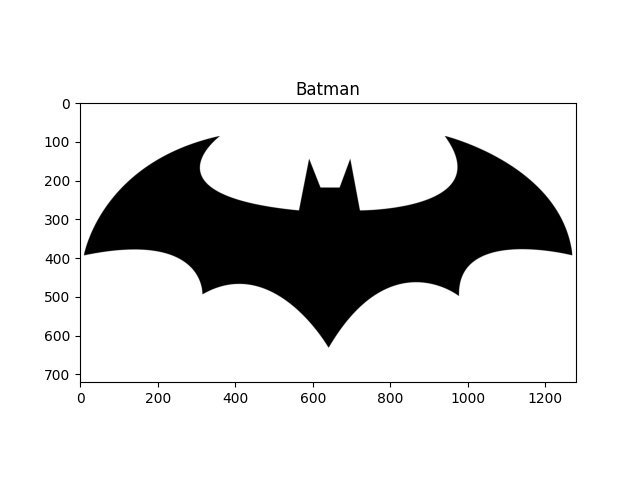

In [3]:
%matplotlib notebook
fig, ax = plt.subplots()
pos = []
def onclick(event):
    pos.append([event.xdata,event.ydata])
fig.canvas.mpl_connect('button_press_event', onclick)
plt.title('Batman')
plt.imshow(img)

In [4]:
pos

[[350.3870967741936, 91.77419354838707],
 [9.741935483870975, 388.54838709677415],
 [314.2580645161291, 486.6129032258064],
 [634.258064516129, 620.8064516129032],
 [974.9032258064515, 491.774193548387],
 [1266.516129032258, 385.9677419354838],
 [949.0967741935483, 89.19354838709683],
 [698.7741935483871, 145.9677419354839],
 [672.9677419354839, 210.48387096774195],
 [621.3548387096773, 215.64516129032256],
 [595.5483870967741, 145.9677419354839],
 [590.3870967741937, 145.9677419354839],
 [510.3870967741936, 267.258064516129],
 [445.87096774193543, 254.35483870967744],
 [381.3548387096774, 233.70967741935488],
 [334.90322580645164, 210.48387096774195],
 [309.09677419354836, 182.0967741935484],
 [319.4193548387097, 133.0645161290323],
 [280.7096774193548, 107.25806451612902],
 [185.22580645161293, 143.38709677419354],
 [141.35483870967744, 184.67741935483878],
 [79.4193548387097, 246.61290322580646],
 [27.80645161290323, 334.35483870967744],
 [82.0, 370.48387096774195],
 [180.0645161290

In [5]:
pos_array = np.array(pos)

In [6]:
x = pos_array[:,0]

In [7]:
y = pos_array[:,1]

In [8]:
t = np.linspace(0,1, len(x))

In [9]:
pw_spline_x = interp1d(t, x, kind = 'cubic') #spline piecewise 
pw_spline_y = interp1d(t,y, kind = 'cubic') #spline piecewise 

In [10]:
neval = 100
teval = np.linspace(min(t),max(t), neval)

In [11]:
xeval = pw_spline_x(teval)
yeval = pw_spline_y(teval)

In [12]:
window_y = 50
window_x = 500    
x_min = np.min(x)
y_min = np.min(y)
x_max = np.max(x)
y_max = np.max(y)

<IPython.core.display.Javascript object>


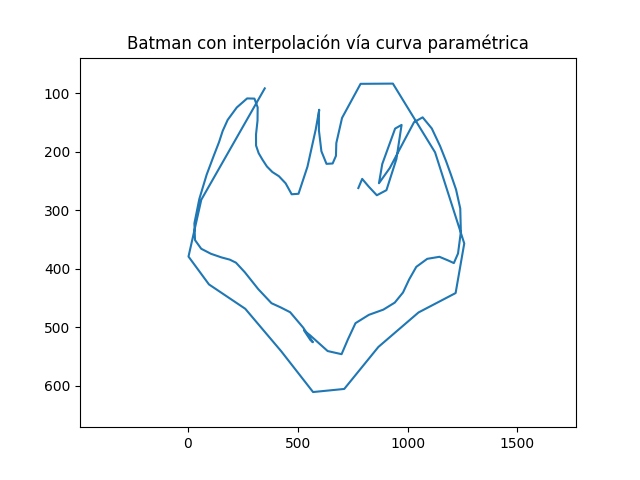

In [13]:
fig, ax = plt.subplots()
ax.plot(xeval,yeval)
ax.set_ylim(np.max(y)+window_y,np.min(y)-window_y)
plt.xlim(np.min(x)-window_x,np.max(x)+window_x)
plt.title('Batman con interpolación vía curva paramétrica')
plt.show()

In [15]:
def make_plot(ax, idx):
    ax.plot(x[:idx], y[:idx])
    ax.set_ylim(y_max+window_y,y_min-window_y)
    plt.xlim(x_min-window_x,x_max+window_x)
    plt.plot(x[:idx], y[:idx], 'bo-')
    plt.title('Batman con interpolación vía curva paramétrica')
    fig.canvas.draw()

<IPython.core.display.Javascript object>


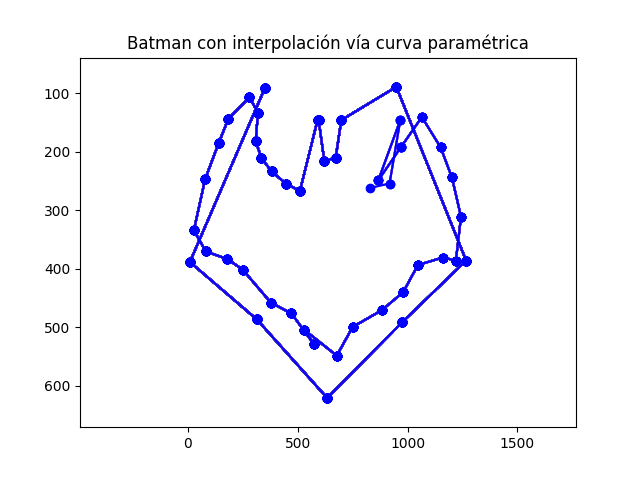

In [16]:
%matplotlib notebook
fig, ax = plt.subplots()
for idx,_ in enumerate(t):
    make_plot(ax, idx)
    time.sleep(0.2)